# Parameter Variation and Optimization

Create a machine with 4 poles:

In [1]:
machine = dict(
    name="PM-4-130",
    lfe=0.1,
    poles=4,
    outer_diam=0.13,
    bore_diam=0.07,
    inner_diam=0.015,
    airgap=0.0015,
     
    stator=dict(
        num_slots=12,
        rlength=1.0,
        statorRotor3=dict(
            slot_height=0.02,
            slot_h1=0.002,
            slot_h2=0.004,
            slot_r1=0.0,
            slot_r2=0.0,
            wedge_width1=0.0,
            wedge_width2=0.0,
            middle_line=0,
            tooth_width=0.009,
            slot_top_sh=0,
            slot_width=0.003)
    ),

    magnet=dict(
        magnetSector=dict(
            magn_num=1,
            magn_width_pct=0.6,
            magn_height=0.005,
            magn_shape=0.02,
            bridge_height=0,
            magn_type=2,
            condshaft_r=0.02,
            magn_ori=1,
            magn_rfe=0.0,
            bridge_width=0,
            magn_len=1)
    ),

    windings=dict(
        num_phases=3,
        num_wires=20,
        coil_span=3.0,
        num_layers=1)
)

Use a pm_sym_fast calculation at a rotor speed of 5000 1/min:

In [2]:
simulation = dict(
    speed=5000.0 / 60,
    calculationMode="pm_sym_fast",
    magn_temp=20.0,
    wind_temp=60,
    current=28.284,
    period_frac=6,
    angl_i_up=0.0)

Define the variation parameters with their ranges and number of steps:

In [3]:
decision_vars = [
        {"steps": 5, "bounds": [3e-3, 8e-3],
         "name": "stator.statorRotor3.slot_width",
         "label": "Slot Width/m"},
        {"steps": 5, "bounds": [0.72, 0.85],
         "name": "magnet.magnetSector.magn_width_pct",
         "label": "Rel. Magnet Width"},
        {"steps": 5, "bounds": [0.024, 0.0335],
         "name": "magnet.magnetSector.magn_shape",
         "label": "Magnet Shape/m"}
    ]

Define the objective parameters:

In [4]:
objective_vars = [
        {"name": "machine.torque",
         "label": "Load Torque/Nm"},
        {"name": "torque[0].ripple",
         "label": "Cogging Torque/Nm"},
        {"name": "torque[-1].ripple",
         "label": "Torque Ripple/Nm"}
    ]

Combine the objective and variation parameters and set the population size which is in this case the upper limit of the bucket size (ie. the number of parallel calculations):

In [5]:
parvardef = {
    "objective_vars": objective_vars,
    "population_size": 20,
    "decision_vars": decision_vars
}

Use logging to get a feedback during the calculation:

In [6]:
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(message)s')

Setup up an engine the drives the calculation. Here we chose a multi-core calculation: 

In [7]:
from femagtools.multiproc import Engine
engine = Engine()

Define the working directory:

In [8]:
import pathlib
workdir = pathlib.Path.home() / 'parvar2'
workdir.mkdir(parents=True, exist_ok=True)

Start the parameter variation with the total 125 FE calculations (duration on a Linux i7 laptop with 8 cores: 4min):

In [9]:
import femagtools.parstudy
parvar = femagtools.parstudy.Grid(workdir)
results = parvar(parvardef, machine, simulation, engine)

2023-10-22 14:05:50,609 [12, 12]
2023-10-22 14:05:50,610 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2023-10-22 14:05:50,610 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)
2023-10-22 14:05:50,610 ........ 1 / 8 results: (0,)
2023-10-22 14:05:50,611 prepare [0.003 0.72  0.024]
2023-10-22 14:05:50,611 create new model 'PM-4-130'
2023-10-22 14:05:50,644 prepare [0.00425 0.72    0.024  ]
2023-10-22 14:05:50,644 create new model 'PM-4-130'
2023-10-22 14:05:50,646 prepare [0.0055 0.72   0.024 ]
2023-10-22 14:05:50,646 create new model 'PM-4-130'
2023-10-22 14:05:50,648 prepare [0.00675 0.72    0.024  ]
2023-10-22 14:05:50,648 create new model 'PM-4-130'
2023-10-22 14:05:50,649 prepare [0.008 0.72  0.024]
2023-10-22 14:05:50,650 create new model 'PM-4-130'
2023-10-22 14:05:50,651 prepare [0.003  0.7525 0.024 ]
2023-10-22 14:05:50,651 create new model 'PM-4-130'
2023-10-22 14:05:50,653 prepare [0.00

2021-09-13 11:19:14,603 create new model 'PM-4-130'
2021-09-13 11:19:14,605 prepare [0.003   0.7525  0.02875]
2021-09-13 11:19:14,606 create new model 'PM-4-130'
2021-09-13 11:19:14,607 prepare [0.00425 0.7525  0.02875]
2021-09-13 11:19:14,607 create new model 'PM-4-130'
2021-09-13 11:19:14,609 prepare [0.0055  0.7525  0.02875]
2021-09-13 11:19:14,609 create new model 'PM-4-130'
2021-09-13 11:19:14,611 prepare [0.00675 0.7525  0.02875]
2021-09-13 11:19:14,611 create new model 'PM-4-130'
2021-09-13 11:19:14,614 prepare [0.008   0.7525  0.02875]
2021-09-13 11:19:14,616 create new model 'PM-4-130'
2021-09-13 11:19:14,621 prepare [0.003   0.785   0.02875]
2021-09-13 11:19:14,623 create new model 'PM-4-130'
2021-09-13 11:19:14,625 prepare [0.00425 0.785   0.02875]
2021-09-13 11:19:14,625 create new model 'PM-4-130'
2021-09-13 11:19:14,627 prepare [0.0055  0.785   0.02875]
2021-09-13 11:19:14,627 create new model 'PM-4-130'
2021-09-13 11:19:14,629 prepare [0.00675 0.785   0.02875]
2021-09-13

2021-09-13 11:19:54,575 Finished pid: 16691 return 0
2021-09-13 11:19:54,592 FEMAG /home/tar/parvar2/16: femag.fsl
2021-09-13 11:19:55,459 Finished pid: 16696 return 0
2021-09-13 11:19:55,528 Finished pid: 16715 return 0
2021-09-13 11:19:55,552 Finished pid: 16710 return 0
2021-09-13 11:19:55,572 Finished pid: 16721 return 0
2021-09-13 11:19:55,596 Finished pid: 16716 return 0
2021-09-13 11:19:55,680 Finished pid: 16709 return 0
2021-09-13 11:19:55,790 Finished pid: 16726 return 0
2021-09-13 11:19:59,113 Finished pid: 16732 return 0
2021-09-13 11:19:59,115 Elapsed time 21 s Status ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
2021-09-13 11:19:59,116 Reading /home/tar/parvar2/0/PM-4-130_001.BATCH
2021-09-13 11:19:59,124 Reading /home/tar/parvar2/1/PM-4-130_001.BATCH
2021-09-13 11:19:59,128 Reading /home/tar/parvar2/2/PM-4-130_001.BATCH
2021-09-13 11:19:59,134 Reading /home/tar/parvar2/3/PM-4-130_001.BATCH
2021-09-13 11:19:59,141 Reading /home/tar/

2021-09-13 11:20:24,940 prepare [0.00425 0.785   0.0335 ]
2021-09-13 11:20:24,941 create new model 'PM-4-130'
2021-09-13 11:20:24,943 prepare [0.0055 0.785  0.0335]
2021-09-13 11:20:24,943 create new model 'PM-4-130'
2021-09-13 11:20:24,945 prepare [0.00675 0.785   0.0335 ]
2021-09-13 11:20:24,946 create new model 'PM-4-130'
2021-09-13 11:20:24,948 prepare [0.008  0.785  0.0335]
2021-09-13 11:20:24,949 create new model 'PM-4-130'
2021-09-13 11:20:24,951 prepare [0.003  0.8175 0.0335]
2021-09-13 11:20:24,952 create new model 'PM-4-130'
2021-09-13 11:20:24,955 prepare [0.00425 0.8175  0.0335 ]
2021-09-13 11:20:24,956 create new model 'PM-4-130'
2021-09-13 11:20:24,959 prepare [0.0055 0.8175 0.0335]
2021-09-13 11:20:24,960 create new model 'PM-4-130'
2021-09-13 11:20:24,969 prepare [0.00675 0.8175  0.0335 ]
2021-09-13 11:20:24,971 create new model 'PM-4-130'
2021-09-13 11:20:25,035 Started 17
2021-09-13 11:20:25,029 FEMAG /home/tar/parvar2/2: femag.fsl
2021-09-13 11:20:25,028 FEMAG /home/

Print the results in table form:

In [10]:
import numpy as np
x = results['x']
f = results['f']

# print header
print(' '.join(['{:15}'.format(s)
                for s in [d['label']
                          for d in parvardef['decision_vars']] +
                [o['label']
                 for o in parvardef['objective_vars']]]))
print()
# print values in table format
for l in np.vstack((x, f)).T:
    print(' '.join(['{:15.4f}'.format(x) for x in l]))

Slot Width/m    Rel. Magnet Width Magnet Shape/m  Load Torque/Nm  Cogging Torque/Nm Torque Ripple/Nm

         0.0030          0.7200          0.0240         13.7317          0.1173          0.4150
         0.0043          0.7200          0.0240         13.5960          0.2254          0.5200
         0.0055          0.7200          0.0240         13.3981          0.3091          0.6540
         0.0067          0.7200          0.0240         13.1605          0.4465          0.7570
         0.0080          0.7200          0.0240         12.8559          0.5656          0.9200
         0.0030          0.7525          0.0240         13.8450          0.0959          0.2270
         0.0043          0.7525          0.0240         13.7096          0.1379          0.3010
         0.0055          0.7525          0.0240         13.5181          0.1521          0.3630
         0.0067          0.7525          0.0240         13.2720          0.1861          0.3890
         0.0080          0.7525   

The next step will be the creation of the pareto sets. Before doing that we must define the optimization criteria. We want all values be minimize with the exception of the torque:

In [11]:
parvardef['objective_vars'][0]['sign']=-1

Now we are ready to create the pareto sets:

In [12]:
import femagtools.moproblem
import femagtools.moo

size = np.shape(f)[1]
prob = femagtools.moproblem.FemagMoProblem(parvardef['decision_vars'],
                                           parvardef['objective_vars'])

pop = femagtools.moo.Population(prob, size)
signs = [o.get('sign', 1)
         for o in parvardef['objective_vars']]
pop.populate(np.array(x).T, np.array(f), signs)
                               
px = pop.get_ranked_decisions()
po = pop.get_ranked_objectives(signs)
#
fp = dict()
xp = dict()
for k in po:
    #print("k {} len {}".format(k, len(pareto[k])))
    fp[k] = np.array(po[k]).T
    xp[k] = np.array(px[k]).T

for k in xp:
    xp[k] = [xp[k][0]*1e3, xp[k][1], xp[k][2]*1e3]

2023-10-22 14:09:46,489 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2023-10-22 14:09:46,490 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)


Show the results of the pareto front

In [13]:
np.concatenate((np.array(xp[0]), fp[0])).T

array([[ 3.      ,  0.785   , 24.      , 13.9274  ,  0.073814,  0.142   ],
       [ 4.25    ,  0.785   , 24.      , 13.7949  ,  0.108203,  0.14    ],
       [ 3.      ,  0.85    , 24.      , 13.9744  ,  0.074298,  0.184   ],
       [ 3.      ,  0.72    , 26.375   , 14.3701  ,  0.168469,  0.621   ],
       [ 3.      ,  0.785   , 26.375   , 14.6945  ,  0.27715 ,  0.41    ],
       [ 3.      ,  0.8175  , 26.375   , 14.7971  ,  0.193612,  0.529   ],
       [ 3.      ,  0.85    , 26.375   , 14.8044  ,  0.179593,  0.542   ],
       [ 3.      ,  0.72    , 28.75    , 14.9065  ,  0.29331 ,  0.806   ],
       [ 3.      ,  0.7525  , 28.75    , 15.137   ,  0.5899  ,  0.697   ],
       [ 3.      ,  0.785   , 28.75    , 15.3271  ,  0.65055 ,  0.757   ],
       [ 3.      ,  0.8175  , 28.75    , 15.4751  ,  0.51346 ,  0.958   ],
       [ 3.      ,  0.85    , 28.75    , 15.492   ,  0.48529 ,  0.987   ],
       [ 3.      ,  0.72    , 31.125   , 15.353   ,  0.45095 ,  1.      ],
       [ 3.      ,  0.785

Display a 3D scatter plot with all results and the pareto front:

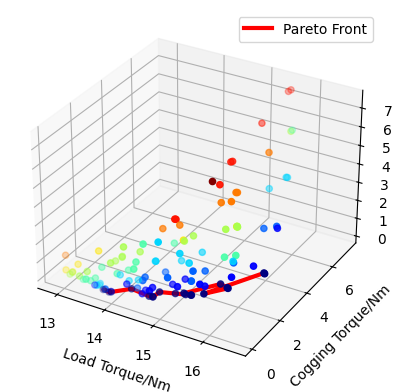

In [14]:
import matplotlib.pyplot as pl
import matplotlib.colors
import matplotlib.cm
import mpl_toolkits.mplot3d as mpl

cm = pl.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=0, vmax=max(fp.keys()))
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)

fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
for k in fp:
    ax.scatter(fp[k][0], fp[k][1], fp[k][2], color=scalarMap.to_rgba(k))
ax.plot(fp[0][0], fp[0][1], fp[0][2],
        color='red', linewidth=3, label='Pareto Front')
ax.set_xlabel(parvardef['objective_vars'][0]['label'])
ax.set_ylabel(parvardef['objective_vars'][1]['label'])
ax.set_zlabel(parvardef['objective_vars'][2]['label'])

pl.legend()
pl.show()

Show the const and the ripple torque values in a 2D diagram:

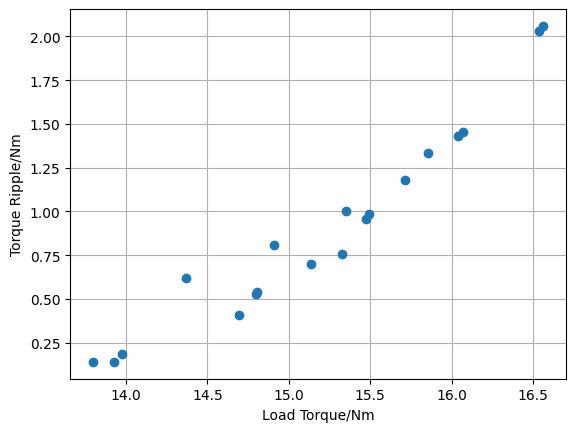

In [16]:
ix = 0
iy = 2
pl.plot(fp[0][ix], fp[0][iy], 'o')
pl.xlabel(objective_vars[ix]['label'])
pl.ylabel(objective_vars[iy]['label'])
pl.grid()

With multi objective optimization

In [18]:
import femagtools.opt
import femagtools.docker

workdir = pathlib.Path.home() / 'opti'

parvardef['population_size'] = 48

parvardef['decision_vars'][0]['desc'] = 'Slot width/mm' 
parvardef['decision_vars'][1]['desc'] = 'rel. Magn. width' 
parvardef['decision_vars'][2]['desc'] = 'Magn. Shape/mm' 
parvardef['objective_vars'][0]['desc'] = 'Load Torque/Nm' 
parvardef['objective_vars'][1]['desc'] = 'Cogging Torque/Nm' 
parvardef['objective_vars'][2]['desc'] = 'Torque Ripple/Nm' 

engine = femagtools.docker.Engine(num_threads=9, port=5555)
opt = femagtools.opt.Optimizer(workdir, magnetizingCurves=dict(), magnetMat=dict())
num_generations = 6
results = opt.optimize(num_generations, parvardef, machine, simulation, engine)

2021-09-13 11:26:42,735 Decision Vars: ['stator.statorRotor3.slot_width', 'magnet.magnetSector.magn_width_pct', 'magnet.magnetSector.magn_shape']
2021-09-13 11:26:42,736 bounds lower: (0.003, 0.72, 0.024)  upper: (0.008, 0.85, 0.0335)
2021-09-13 11:26:42,738 Optimize x:3 f:3 generations:6 population size:48
2021-09-13 11:26:42,739 Generation 0
2021-09-13 11:26:42,739 create new model 'PM-4-130'
2021-09-13 11:26:42,771 create simulation 'pm_sym_fast'
2021-09-13 11:26:42,784 create new model 'PM-4-130'
2021-09-13 11:26:42,785 create simulation 'pm_sym_fast'
2021-09-13 11:26:42,787 create new model 'PM-4-130'
2021-09-13 11:26:42,788 create simulation 'pm_sym_fast'
2021-09-13 11:26:42,789 create new model 'PM-4-130'
2021-09-13 11:26:42,790 create simulation 'pm_sym_fast'
2021-09-13 11:26:42,791 create new model 'PM-4-130'
2021-09-13 11:26:42,793 create simulation 'pm_sym_fast'
2021-09-13 11:26:42,798 create new model 'PM-4-130'
2021-09-13 11:26:42,800 create simulation 'pm_sym_fast'
2021-0

2021-09-13 11:26:59,931 upload /home/tar/opti/35/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:00,862 upload /home/tar/opti/36/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:02,136 upload /home/tar/opti/37/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:02,447 upload /home/tar/opti/38/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:02,512 upload /home/tar/opti/39/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:02,871 upload /home/tar/opti/40/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:03,317 upload /home/tar/opti/41/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:03,389 upload /home/tar/opti/42/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:04,219 upload /home/tar/opti/43/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:05,184 upload /home/tar/opti/44/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:05,342 upload /home/tar/opti/45/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:05,478 upload /home/tar/opti/46/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:05,482 upload /home/tar/opti/47/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:11,760 R

2021-09-13 11:27:11,979 create simulation 'pm_sym_fast'
2021-09-13 11:27:11,980 create new model 'PM-4-130'
2021-09-13 11:27:11,981 create simulation 'pm_sym_fast'
2021-09-13 11:27:11,982 create new model 'PM-4-130'
2021-09-13 11:27:11,983 create simulation 'pm_sym_fast'
2021-09-13 11:27:11,984 create new model 'PM-4-130'
2021-09-13 11:27:11,984 create simulation 'pm_sym_fast'
2021-09-13 11:27:11,986 create new model 'PM-4-130'
2021-09-13 11:27:11,990 create simulation 'pm_sym_fast'
2021-09-13 11:27:11,992 create new model 'PM-4-130'
2021-09-13 11:27:11,993 create simulation 'pm_sym_fast'
2021-09-13 11:27:11,994 create new model 'PM-4-130'
2021-09-13 11:27:11,995 create simulation 'pm_sym_fast'
2021-09-13 11:27:11,997 create new model 'PM-4-130'
2021-09-13 11:27:11,998 create simulation 'pm_sym_fast'
2021-09-13 11:27:11,999 create new model 'PM-4-130'
2021-09-13 11:27:12,000 create simulation 'pm_sym_fast'
2021-09-13 11:27:12,001 create new model 'PM-4-130'
2021-09-13 11:27:12,002 crea

2021-09-13 11:27:33,546 upload /home/tar/opti/45/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:33,550 upload /home/tar/opti/46/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:33,951 upload /home/tar/opti/47/sin_4p.poc --> sin_4p.poc
2021-09-13 11:27:39,378 Reading /home/tar/opti/0/PM-4-130_001.BATCH
2021-09-13 11:27:39,382 Reading /home/tar/opti/1/PM-4-130_001.BATCH
2021-09-13 11:27:39,386 Reading /home/tar/opti/2/PM-4-130_001.BATCH
2021-09-13 11:27:39,390 Reading /home/tar/opti/3/PM-4-130_001.BATCH
2021-09-13 11:27:39,394 Reading /home/tar/opti/4/PM-4-130_001.BATCH
2021-09-13 11:27:39,397 Reading /home/tar/opti/5/PM-4-130_001.BATCH
2021-09-13 11:27:39,400 Reading /home/tar/opti/6/PM-4-130_001.BATCH
2021-09-13 11:27:39,405 Reading /home/tar/opti/7/PM-4-130_001.BATCH
2021-09-13 11:27:39,409 Reading /home/tar/opti/8/PM-4-130_001.BATCH
2021-09-13 11:27:39,413 Reading /home/tar/opti/9/PM-4-130_001.BATCH
2021-09-13 11:27:39,417 Reading /home/tar/opti/10/PM-4-130_001.BATCH
2021-09-13 11:27:39,421 Re

2021-09-13 11:27:39,671 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,673 create new model 'PM-4-130'
2021-09-13 11:27:39,675 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,677 create new model 'PM-4-130'
2021-09-13 11:27:39,679 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,680 create new model 'PM-4-130'
2021-09-13 11:27:39,682 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,683 create new model 'PM-4-130'
2021-09-13 11:27:39,685 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,686 create new model 'PM-4-130'
2021-09-13 11:27:39,688 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,726 create new model 'PM-4-130'
2021-09-13 11:27:39,727 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,729 create new model 'PM-4-130'
2021-09-13 11:27:39,730 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,731 create new model 'PM-4-130'
2021-09-13 11:27:39,732 create simulation 'pm_sym_fast'
2021-09-13 11:27:39,733 create new model 'PM-4-130'
2021-09-13 11:27:39,734 crea

2021-09-13 11:28:06,362 Reading /home/tar/opti/8/PM-4-130_001.BATCH
2021-09-13 11:28:06,367 Reading /home/tar/opti/9/PM-4-130_001.BATCH
2021-09-13 11:28:06,371 Reading /home/tar/opti/10/PM-4-130_001.BATCH
2021-09-13 11:28:06,375 Reading /home/tar/opti/11/PM-4-130_001.BATCH
2021-09-13 11:28:06,380 Reading /home/tar/opti/12/PM-4-130_001.BATCH
2021-09-13 11:28:06,384 Reading /home/tar/opti/13/PM-4-130_001.BATCH
2021-09-13 11:28:06,389 Reading /home/tar/opti/14/PM-4-130_001.BATCH
2021-09-13 11:28:06,393 Reading /home/tar/opti/15/PM-4-130_001.BATCH
2021-09-13 11:28:06,397 Reading /home/tar/opti/16/PM-4-130_001.BATCH
2021-09-13 11:28:06,401 Reading /home/tar/opti/17/PM-4-130_001.BATCH
2021-09-13 11:28:06,405 Reading /home/tar/opti/18/PM-4-130_001.BATCH
2021-09-13 11:28:06,410 Reading /home/tar/opti/19/PM-4-130_001.BATCH
2021-09-13 11:28:06,414 Reading /home/tar/opti/20/PM-4-130_001.BATCH
2021-09-13 11:28:06,418 Reading /home/tar/opti/21/PM-4-130_001.BATCH
2021-09-13 11:28:06,423 Reading /hom

2021-09-13 11:28:07,440 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,444 create new model 'PM-4-130'
2021-09-13 11:28:07,445 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,447 create new model 'PM-4-130'
2021-09-13 11:28:07,448 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,449 create new model 'PM-4-130'
2021-09-13 11:28:07,451 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,452 create new model 'PM-4-130'
2021-09-13 11:28:07,453 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,454 create new model 'PM-4-130'
2021-09-13 11:28:07,455 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,456 create new model 'PM-4-130'
2021-09-13 11:28:07,457 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,459 create new model 'PM-4-130'
2021-09-13 11:28:07,460 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,461 create new model 'PM-4-130'
2021-09-13 11:28:07,462 create simulation 'pm_sym_fast'
2021-09-13 11:28:07,463 create new model 'PM-4-130'
2021-09-13 11:28:07,464 crea

2021-09-13 11:28:34,199 Reading /home/tar/opti/19/PM-4-130_001.BATCH
2021-09-13 11:28:34,203 Reading /home/tar/opti/20/PM-4-130_001.BATCH
2021-09-13 11:28:34,207 Reading /home/tar/opti/21/PM-4-130_001.BATCH
2021-09-13 11:28:34,212 Reading /home/tar/opti/22/PM-4-130_001.BATCH
2021-09-13 11:28:34,216 Reading /home/tar/opti/23/PM-4-130_001.BATCH
2021-09-13 11:28:34,219 Reading /home/tar/opti/24/PM-4-130_001.BATCH
2021-09-13 11:28:34,224 Reading /home/tar/opti/25/PM-4-130_001.BATCH
2021-09-13 11:28:34,229 Reading /home/tar/opti/26/PM-4-130_001.BATCH
2021-09-13 11:28:34,233 Reading /home/tar/opti/27/PM-4-130_001.BATCH
2021-09-13 11:28:34,237 Reading /home/tar/opti/28/PM-4-130_001.BATCH
2021-09-13 11:28:34,241 Reading /home/tar/opti/29/PM-4-130_001.BATCH
2021-09-13 11:28:34,245 Reading /home/tar/opti/30/PM-4-130_001.BATCH
2021-09-13 11:28:34,249 Reading /home/tar/opti/31/PM-4-130_001.BATCH
2021-09-13 11:28:34,253 Reading /home/tar/opti/32/PM-4-130_001.BATCH
2021-09-13 11:28:34,257 Reading /h

2021-09-13 11:28:34,400 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,402 create new model 'PM-4-130'
2021-09-13 11:28:34,403 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,405 create new model 'PM-4-130'
2021-09-13 11:28:34,406 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,407 create new model 'PM-4-130'
2021-09-13 11:28:34,409 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,410 create new model 'PM-4-130'
2021-09-13 11:28:34,411 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,412 create new model 'PM-4-130'
2021-09-13 11:28:34,413 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,414 create new model 'PM-4-130'
2021-09-13 11:28:34,414 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,415 create new model 'PM-4-130'
2021-09-13 11:28:34,416 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,417 create new model 'PM-4-130'
2021-09-13 11:28:34,418 create simulation 'pm_sym_fast'
2021-09-13 11:28:34,419 create new model 'PM-4-130'
2021-09-13 11:28:34,421 crea

2021-09-13 11:29:02,414 Reading /home/tar/opti/30/PM-4-130_001.BATCH
2021-09-13 11:29:02,419 Reading /home/tar/opti/31/PM-4-130_001.BATCH
2021-09-13 11:29:02,423 Reading /home/tar/opti/32/PM-4-130_001.BATCH
2021-09-13 11:29:02,427 Reading /home/tar/opti/33/PM-4-130_001.BATCH
2021-09-13 11:29:02,431 Reading /home/tar/opti/34/PM-4-130_001.BATCH
2021-09-13 11:29:02,435 Reading /home/tar/opti/35/PM-4-130_001.BATCH
2021-09-13 11:29:02,439 Reading /home/tar/opti/36/PM-4-130_001.BATCH
2021-09-13 11:29:02,443 Reading /home/tar/opti/37/PM-4-130_001.BATCH
2021-09-13 11:29:02,447 Reading /home/tar/opti/38/PM-4-130_001.BATCH
2021-09-13 11:29:02,451 Reading /home/tar/opti/39/PM-4-130_001.BATCH
2021-09-13 11:29:02,454 Reading /home/tar/opti/40/PM-4-130_001.BATCH
2021-09-13 11:29:02,458 Reading /home/tar/opti/41/PM-4-130_001.BATCH
2021-09-13 11:29:02,462 Reading /home/tar/opti/42/PM-4-130_001.BATCH
2021-09-13 11:29:02,467 Reading /home/tar/opti/43/PM-4-130_001.BATCH
2021-09-13 11:29:02,470 Reading /h

2021-09-13 11:29:02,586 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,587 create new model 'PM-4-130'
2021-09-13 11:29:02,588 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,590 create new model 'PM-4-130'
2021-09-13 11:29:02,590 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,592 create new model 'PM-4-130'
2021-09-13 11:29:02,593 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,594 create new model 'PM-4-130'
2021-09-13 11:29:02,595 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,596 create new model 'PM-4-130'
2021-09-13 11:29:02,598 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,600 create new model 'PM-4-130'
2021-09-13 11:29:02,601 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,602 create new model 'PM-4-130'
2021-09-13 11:29:02,603 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,605 create new model 'PM-4-130'
2021-09-13 11:29:02,606 create simulation 'pm_sym_fast'
2021-09-13 11:29:02,607 create new model 'PM-4-130'
2021-09-13 11:29:02,608 crea

2021-09-13 11:29:27,012 Reading /home/tar/opti/40/PM-4-130_001.BATCH
2021-09-13 11:29:27,016 Reading /home/tar/opti/41/PM-4-130_001.BATCH
2021-09-13 11:29:27,020 Reading /home/tar/opti/42/PM-4-130_001.BATCH
2021-09-13 11:29:27,024 Reading /home/tar/opti/43/PM-4-130_001.BATCH
2021-09-13 11:29:27,027 Reading /home/tar/opti/44/PM-4-130_001.BATCH
2021-09-13 11:29:27,031 Reading /home/tar/opti/45/PM-4-130_001.BATCH
2021-09-13 11:29:27,035 Reading /home/tar/opti/46/PM-4-130_001.BATCH
2021-09-13 11:29:27,039 Reading /home/tar/opti/47/PM-4-130_001.BATCH
2021-09-13 11:29:27,057 Generation: 5
rank torque    ripple    ripple     slot_width  magn_width_pctmagn_shape  
0     -13.91      0.09      0.20       0.0041    0.8093    0.0241
0     -14.18      0.07      0.25       0.0031    0.8095    0.0246
0     -14.07      0.11      0.16       0.0031    0.7757    0.0245
0     -14.78      0.18      0.52       0.0031    0.8343    0.0263
0     -16.33      1.70      1.93       0.0033    0.8493    0.0325
0    

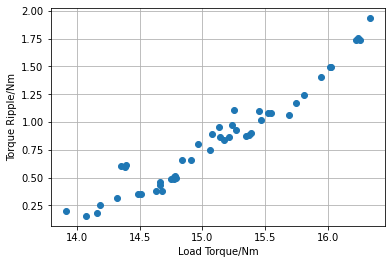

In [22]:
pl.plot([t for t in results['f'][0] if t>0], 
        [p for p in results['f'][2] if p>0], 'o')
pl.xlabel(parvardef['objective_vars'][0]['desc'])
pl.ylabel(parvardef['objective_vars'][2]['desc'])
pl.grid()